# Machine Learning Zoomcamp - Homework 02

This notebook contains the homework assignment for ML Zoomcamp

In [517]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [518]:
import urllib.request
import os

# Download the dataset
url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"
filename = "car_fuel_efficiency.csv"

print(f"Downloading {filename}...")
# urllib.request.urlretrieve(url, filename)

# Verify the download
if os.path.exists(filename):
    file_size = os.path.getsize(filename)
    print(f"✅ Download successful!")
    print(f"File: {filename}")
    print(f"Size: {file_size} bytes")
else:
    print("❌ Download failed!")

✅ Download successful!
File: car_fuel_efficiency.csv
Size: 874188 bytes


In [519]:
df = pd.read_csv('car_fuel_efficiency.csv')
len(df)

9704

In [520]:
# Load the dataset
df = pd.read_csv(filename)
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


# question 1

There's one column with missing values. What is it?
'engine_displacement'
'horsepower'
'vehicle_weight'
'model_year'

answer - horsepower

In [521]:
# Basic data exploration
print("Missing Values:")
# ...existing code...

# Basic data exploration - Combined stats
selected_columns = ['fuel_efficiency_mpg', 'engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

# Create combined DataFrame with missing values and data types
combined_stats = pd.DataFrame({
    'missing_values': df[selected_columns].isnull().sum(),
    'total_values': len(df),
    'non_missing': df[selected_columns].count(),
    'missing_percentage': (df[selected_columns].isnull().sum() / len(df) * 100).round(2),
    'data_type': df[selected_columns].dtypes
})

print("Combined Data Analysis:")
print("=" * 60)
print(combined_stats)

Missing Values:
Combined Data Analysis:
                     missing_values  total_values  non_missing  \
fuel_efficiency_mpg               0          9704         9704   
engine_displacement               0          9704         9704   
horsepower                      708          9704         8996   
vehicle_weight                    0          9704         9704   
model_year                        0          9704         9704   

                     missing_percentage data_type  
fuel_efficiency_mpg                 0.0   float64  
engine_displacement                 0.0     int64  
horsepower                          7.3   float64  
vehicle_weight                      0.0   float64  
model_year                          0.0     int64  


# Question 2

What's the median (50% percentile) for variable 'horsepower'?

answer = 149

In [522]:
median_horsepower = df['horsepower'].median()
print(f"Median horsepower: {median_horsepower}")

Median horsepower: 149.0


# Prepare and split the dataset

Shuffle the dataset (the filtered one you created above), use seed 42.
Split your data in train/val/test sets, with 
`60%/20%/20%` distribution.
Use the same code as in the lectures

In [523]:
max_year = df['model_year'].max()
features_all_df = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']].copy()
features_all_df['age'] = max_year - features_all_df['model_year']
# features_all_df['engine_displacement_norm'] = (features_all_df['engine_displacement'] - features_all_df['engine_displacement'].mean()) / features_all_df['engine_displacement'].std()
# features_df = features_all_df[['engine_displacement_norm', 'horsepower', 'vehicle_weight', 'age','fuel_efficiency_mpg']].copy()
features_df = features_all_df[['engine_displacement', 'horsepower', 'vehicle_weight', 'age','fuel_efficiency_mpg']].copy()
print(f"Filtered dataset shape: {features_df.shape}")
features_df.head()

Filtered dataset shape: (9704, 5)


,engine_displacement,horsepower,vehicle_weight,age,fuel_efficiency_mpg
0,170,159.0,3413.433759,20,13.231729
1,130,97.0,3149.664934,16,13.688217
2,170,78.0,3079.038997,5,14.246341
3,220,NaN,2542.392402,14,16.912736
4,210,140.0,3460.870990,14,12.488369


In [524]:
np.random.seed(42)

n = len(features_df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = features_df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()
print(len(df_train), len(df_val), len(df_test))

5824 1940 1940


In [525]:
y_train_orig = df_train.fuel_efficiency_mpg.values
y_val_orig = df_val.fuel_efficiency_mpg.values
y_test_orig = df_test.fuel_efficiency_mpg.values

y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']
print(len(y_train), len(y_val), len(y_test))


5824 1940 1940


# Question 3

We need to deal with missing values for the column from Q1.
We have two options: fill it with 0 or with the mean of this variable.
Try both options. For each, train a linear regression model without regularization using the code from the lessons.
For computing the mean, use the training only!
Use the validation dataset to evaluate the models and compare the RMSE of each option.
Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?

ANSWER: Both are equally good if round to 2 decimal digits

replaced with mean is better if round to 4.

In [526]:
mean_horsepower = df_train['horsepower'].mean()
print(f"Mean horsepower from training set: {mean_horsepower}")

Mean horsepower from training set: 149.54476367006487


## def train_linear_regression and prepare_X

In [527]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [528]:
def prepare_X(df_, fill_value=0):
    # df_num = df_[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year','age']]
    df_num = df_
    df_num = df_num.fillna(fill_value)
    X = df_num.values
    return X

In [529]:
missing_hp_mask = df_train['horsepower'].isnull()
X_train = prepare_X(df_train) 
# print(X_train[missing_hp_mask]) # check what values are used for missing horsepower (0)
X_train_mean = prepare_X(df_train, mean_horsepower) 
# print(X_train_mean[missing_hp_mask]) # check what values are used for missing horsepower (mean)

# df_train is based on features_df that has only feature cols
# and target fuel_efficiency_mpg is deleted from train
w_0, w = train_linear_regression(X_train, y_train)
w_0_mean, w_mean = train_linear_regression(X_train_mean, y_train)
print(w_0, w)
print(w_0_mean, w_mean)

3.6979796419379856 [ 2.14827083e-06  2.21209296e-04 -3.23460699e-04 -1.64673231e-05]
3.6276735153278103 [ 3.63140955e-06  6.65758686e-04 -3.23242585e-04  2.14173526e-05]


In [530]:
y_pred = w_0 + X_train.dot(w)
y_pred_mean = w_0_mean + X_train_mean.dot(w_mean)

Text(0.5, 1.0, 'Predictions vs actual distribution')

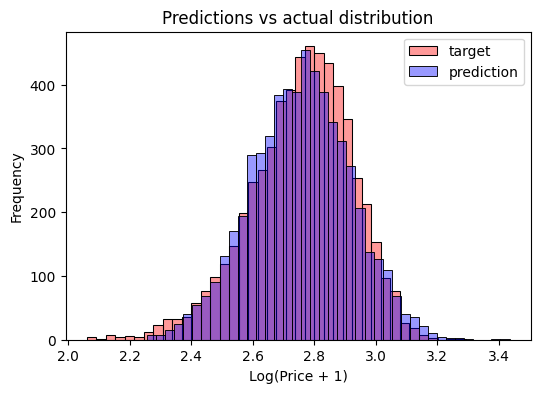

In [531]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='red', alpha=0.4, bins=40)
sns.histplot(y_pred, label='prediction', color='blue', alpha=0.4, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

Text(0.5, 1.0, 'Predictions vs actual distribution (using mean for missing horsepower)')

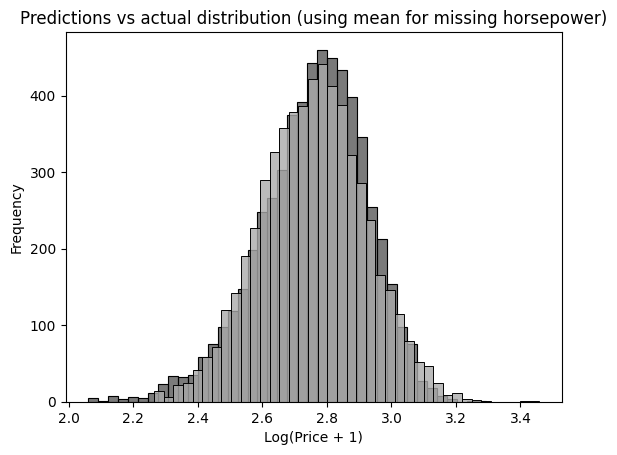

In [532]:
# plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred_mean, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

# plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution (using mean for missing horsepower)')

## def RMSE

In [533]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [534]:
# score of how far are y_pred from y_train
score_train = round(rmse(y_train, y_pred), 4)
score_train_mean = round(rmse(y_train, y_pred_mean), 4)

In [535]:
X_val = prepare_X(df_val)
X_val_mean = prepare_X(df_val, mean_horsepower)
y_pred_val = w_0 + X_val.dot(w)
y_pred_mean_val = w_0_mean + X_val_mean.dot(w_mean)
score_validation = round(rmse(y_val, y_pred_val), 4)
score_validation_mean = round(rmse(y_val, y_pred_mean_val), 4)

In [536]:
print(f"RMSE on training set: {score_train} (using 0 for missing horsepower)")
print(f"RMSE on training set: {score_train_mean} (using mean for missing horsepower) ")
print(f"RMSE on validation set: {score_validation} (using 0 for missing horsepower) ")
print(f"RMSE on validation set: {score_validation_mean} (using mean for missing horsepower) ")

RMSE on training set: 0.0391 (using 0 for missing horsepower)
RMSE on training set: 0.0358 (using mean for missing horsepower) 
RMSE on validation set: 0.04 (using 0 for missing horsepower) 
RMSE on validation set: 0.0373 (using mean for missing horsepower) 


In [537]:
print(f"RMSE on training set: {round(score_train,2)} (using 0 for missing horsepower)")
print(f"RMSE on training set: {round(score_train_mean,2)} (using mean for missing horsepower) ")
print(f"RMSE on validation set: {round(score_validation,2)} (using 0 for missing horsepower) ")
print(f"RMSE on validation set: {round(score_validation_mean,2)} (using mean for missing horsepower) ")

RMSE on training set: 0.04 (using 0 for missing horsepower)
RMSE on training set: 0.04 (using mean for missing horsepower) 
RMSE on validation set: 0.04 (using 0 for missing horsepower) 
RMSE on validation set: 0.04 (using mean for missing horsepower) 


# Question 4

Now let's train a regularized linear regression.

For this question, fill the NAs with 0.

Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
Use `RMSE` to evaluate the model on the validation dataset.

Round the `RMSE` scores to `2` decimal digits.

Which `r` gives the best `RMSE`?

If multiple options give the same best RMSE, select the smallest r

ANSWER: 0

In [538]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [539]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    # print(w_0, w)
    y_pred_train = w_0 + X_train.dot(w)
    y_pred_val = w_0 + X_val.dot(w)
    score_train = round(rmse(y_train, y_pred_train), 4)
    score_val = round(rmse(y_val, y_pred_val), 4)
    print(r, 'train', score_train, 'val', score_val, 'diff', round(score_val - score_train, 4))


0 train 0.0391 val 0.04 diff 0.0009
0.01 train 0.0391 val 0.04 diff 0.0009
0.1 train 0.0391 val 0.04 diff 0.0009
1 train 0.0394 val 0.0402 diff 0.0008
5 train 0.0461 val 0.0467 diff 0.0006
10 train 0.0606 val 0.0616 diff 0.001
100 train 0.245 val 0.2524 diff 0.0074


In [540]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    # print(w_0, w)
    y_pred_train = w_0 + X_train.dot(w)
    y_pred_val = w_0 + X_val.dot(w)
    score_train = round(rmse(y_train, y_pred_train), 2)
    score_val = round(rmse(y_val, y_pred_val), 2)
    print(r, 'train', score_train, 'val', score_val, 'diff', round(score_val - score_train, 2))

0 train 0.04 val 0.04 diff 0.0
0.01 train 0.04 val 0.04 diff 0.0
0.1 train 0.04 val 0.04 diff 0.0
1 train 0.04 val 0.04 diff 0.0
5 train 0.05 val 0.05 diff 0.0
10 train 0.06 val 0.06 diff 0.0
100 train 0.24 val 0.25 diff 0.01


# Question 5

We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.

Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].

For each seed, do the train/validation/test split with 60%/20%/20% distribution.

Fill the missing values with 0 and train a model without regularization.

For each seed, evaluate the model on the validation dataset and collect the RMSE scores.

What's the standard deviation of all the scores? To compute the standard deviation, use np.std.

Round the result to 3 decimal digits (round(std, 3))

ANSWER: Standard deviation = 0.001

## prepare datasets by SEED, split on 3 types

In [ ]:
def prepare_dfs(seed):
    np.random.seed(seed)

    n = len(features_df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = features_df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    # print(len(df_train), len(df_val), len(df_test))

    y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
    y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
    y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']
    result = (df_train, df_val, df_test, y_train, y_val, y_test)
    return result

def prepare_matrix(df, y):
    X = prepare_X(df)
    w_0, w = train_linear_regression(X, y)
    y_pred = w_0 + X.dot(w)
    score = round(rmse(y, y_pred), 4)
    return score, y_pred, X

In [542]:
df_train, df_val, df_test, y_train, y_val, y_test = prepare_dfs(42)
score_train, y_train_pred, X_train = prepare_matrix(df_train, y_train)
score_val, y_val_pred, X_val = prepare_matrix(df_val, y_val)
print(score_train, score_val)

0.0391 0.0399


In [543]:
validation_scores = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    df_train, df_val, df_test, y_train, y_val, y_test = prepare_dfs(seed)
    score_train, y_train_pred, X_train = prepare_matrix(df_train, y_train)
    score_val, y_val_pred, X_val = prepare_matrix(df_val, y_val)
    validation_scores.append(score_val)
    print(seed, score_train, score_val)
std_validation = np.std(validation_scores)
print(f"\nValidation scores: {validation_scores}")
print(f"Standard deviation: {round(std_validation, 3)}")

0 0.0391 0.038
1 0.0389 0.0392
2 0.039 0.0394
3 0.0392 0.0386
4 0.0392 0.0371
5 0.0388 0.0393
6 0.0388 0.0389
7 0.0394 0.0382
8 0.0392 0.0401
9 0.0391 0.0386

Validation scores: [np.float64(0.038), np.float64(0.0392), np.float64(0.0394), np.float64(0.0386), np.float64(0.0371), np.float64(0.0393), np.float64(0.0389), np.float64(0.0382), np.float64(0.0401), np.float64(0.0386)]
Standard deviation: 0.001


# Question 6

Split the dataset like previously, use seed 9.

Combine train and validation datasets.

Fill the missing values with 0 and train a model with r=0.001.

What's the RMSE on the test dataset?


ANSWER: RMSE on test dataset = 0.04 ... no such option...

In [545]:
df_train, df_val, df_test, y_train, y_val, y_test = prepare_dfs(9)

# Combine train and validation datasets
df_train_full = pd.concat([df_train, df_val], ignore_index=True)

# Combine train and validation target vectors
y_train_full = np.concatenate([y_train, y_val])

print(f"Original train size: {len(df_train)}, val size: {len(df_val)}")
print(f"Combined train size: {len(df_train_full)}")
print(f"Original y_train size: {len(y_train)}, y_val size: {len(y_val)}")
print(f"Combined y_train_full size: {len(y_train_full)}")

# Train the model with regularization on the combined dataset
X_train_full = prepare_X(df_train_full)  # Fill missing values with 0
X_test = prepare_X(df_test)

# Train with r=0.001
# w_0, w = train_linear_regression(X_train_full, y_train_full)
w_0, w = train_linear_regression_reg(X_train_full, y_train_full, r=0.001)

# Predict on test set
y_pred_test = w_0 + X_test.dot(w)
score_test = round(rmse(y_test, y_pred_test), 6)

print(f"RMSE on test dataset: {score_test}")

Original train size: 5824, val size: 1940
Combined train size: 7764
Original y_train size: 5824, y_val size: 1940
Combined y_train_full size: 7764
RMSE on test dataset: 0.039194


# use for some test example

In [552]:
i = 2
ad = df_test.iloc[i].to_dict()
np.expm1(y_test[i]), np.expm1(y_pred_test[i]), ad

(np.float64(11.83102773294676),
 np.float64(11.48950438986966),
 {'engine_displacement': 270.0,
  'horsepower': 176.0,
  'vehicle_weight': 3751.005987014248,
  'age': 6.0})

In [551]:
condition = (
    (df['engine_displacement'] == 270.0) & 
    (df['horsepower'] == 176.0) & 
    (df['vehicle_weight'] == 3751.005987014248)
)

matching_rows = df[condition]
print("Matching rows:")
print(matching_rows)

Matching rows:
      engine_displacement  num_cylinders  horsepower  vehicle_weight  \
1193                  270            4.0       176.0     3751.005987   

      acceleration  model_year  origin fuel_type         drivetrain  \
1193          14.7        2017  Europe  Gasoline  Front-wheel drive   

      num_doors  fuel_efficiency_mpg  
1193       -1.0            11.831028  
